# Seleção de Características por PCA
-----------------------------------------------------------------------------------------------------------------------------

# Bibliotecas Utilizadas 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualize
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pd.set_option('display.max_columns', None)

# Carga do dataset normalizado

In [2]:
dataset_normal = pd.read_csv('dataset/dataset-normalizado.csv', header = 0)
print("Length result dataset: {} rows".format(len(dataset_normal)))
dataset_normal.head()

Length result dataset: 649 rows


,school,sex,age,address,famsize,Pstatus,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Medu_0,Medu_1,Medu_2,Medu_3,Medu_4,Fedu_0,Fedu_1,Fedu_2,Fedu_3,Fedu_4,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,is_approved
0,0.0,0.0,0.428571,0.0,0.0,0.0,0.333333,0.333333,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.75,0.50,0.75,0.00,0.00,0.5,0.1250,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.285714,0.0,0.0,1.0,0.000000,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.00,0.50,0.50,0.00,0.00,0.5,0.0625,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,1.0,1.0,0.000000,0.333333,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.75,0.50,0.25,0.25,0.50,0.5,0.1875,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.000000,0.0,0.0,1.0,0.000000,0.666667,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.50,0.25,0.25,0.00,0.00,1.0,0.0000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,0.142857,0.0,0.0,1.0,0.000000,0.333333,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.75,0.50,0.25,0.00,0.25,1.0,0.0000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


# Separa o dataset em features e target

In [3]:
# Separa o dataset_normal em dataset_features e dataset_target

features = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'traveltime', 'studytime', 'failures', 'schoolsup', 
            'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 
            'Dalc', 'Walc', 'health', 'absences', 'Medu_0', 'Medu_1', 'Medu_2', 'Medu_3', 'Medu_4', 'Fedu_0', 'Fedu_1', 
            'Fedu_2', 'Fedu_3', 'Fedu_4', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 
            'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 
            'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other']

# Separating out the features
dataset_features = pd.DataFrame(dataset_normal.loc[:, features].values, columns=[features])

# Separating out the target
dataset_target = pd.DataFrame(dataset_normal.loc[:, ['is_approved']].values, columns=['is_approved'])

In [4]:
# Dataset apenas com as características

print("Number of features: {}" .format(len(dataset_features.columns)))
print("Number of target: {}" .format(len(dataset_target.columns)))

Number of features: 51
Number of target: 1


#  Função para aplicar o PCA e gera o gráfico com taxa de explicação

In [5]:
def aplica_pca(taxa, dataset_features):
    
    if taxa == 1.0:
        pca = PCA()
        dataset_reduced = pca.fit_transform(dataset_features)
    else:      
        pca = PCA(n_components = taxa)
        dataset_reduced = pca.fit_transform(dataset_features)

    principal_components = pd.DataFrame(data=dataset_reduced)
    principal_components.add_prefix('PC_').head()

    # Considerando todas as componentes principais
    variance_explaneid = pca.explained_variance_ratio_

    print("Taxa de Variância Explicada: {}" .format(taxa))
    print("Número de Componentes Principais: {}" .format(len(principal_components.columns)))


    # Gráfico de variação explicada com uma função do número de dimensões
    cumsum = np.cumsum(pca.explained_variance_ratio_)

    plt.plot(cumsum)
    plt.title('Variância Explicada x Dimensões')
    plt.ylabel('Variância Explicada')
    plt.xlabel('Dimensões')
    plt.show()
    
    return principal_components

###  1 - Taxa de Variância Explicada: 100%

Taxa de Variância Explicada: 1
Número de Componentes Principais: 51


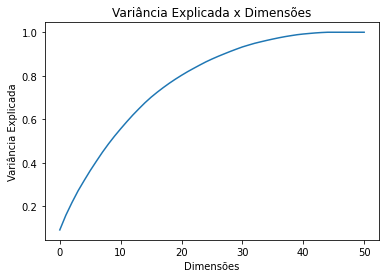

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,PC_30,PC_31,PC_32,PC_33,PC_34,PC_35,PC_36,PC_37,PC_38,PC_39,PC_40,PC_41,PC_42,PC_43,PC_44,PC_45,PC_46,PC_47,PC_48,PC_49,PC_50
0,0.437384,0.610848,-0.928399,0.067422,-0.781877,-0.315036,-0.283928,-0.744882,-0.335167,-0.128893,-0.680501,0.423675,-0.605605,0.317296,-0.726211,0.597447,0.705736,-0.033399,-0.336829,-0.546119,-0.143657,0.578406,0.266777,0.469817,-0.345410,-0.301936,0.288700,-0.611307,-0.138903,-0.104078,-0.073193,0.245431,-0.081370,-0.415013,-0.472105,0.223163,-0.397053,0.246928,0.036441,0.094863,0.036020,-0.215654,0.083259,-0.035906,0.007940,7.316112e-15,1.742954e-16,4.536078e-17,-4.965688e-16,-9.383977e-17,3.030608e-16
1,-0.820003,0.496801,0.250513,-0.769484,-0.777974,-0.150182,0.747129,-0.409078,0.291539,-0.995386,-0.330697,-0.459876,-0.607716,0.264172,-0.313466,-0.643996,-0.232379,0.456937,-0.100078,0.307565,0.050138,-0.320949,-0.194713,0.032938,-0.095590,-0.176171,-0.033575,-0.001839,-0.350067,0.167838,-0.080086,0.271164,-0.123376,0.007457,0.050812,-0.158364,-0.127960,-0.032572,0.002828,0.053440,0.117455,-0.077451,0.015262,-0.031492,-0.020736,-4.827399e-16,-2.969461e-15,9.207468e-16,5.347584e-16,-4.523893e-16,7.721745e-16
2,-0.644557,0.004811,-0.611295,-0.462880,0.102930,1.039909,-0.208754,-0.569245,0.223915,-0.915931,-0.712058,0.330954,-0.412271,0.318752,-0.150912,-0.217878,-0.310312,-0.067829,0.126350,-0.076875,-0.612877,-0.513818,0.087771,1.096752,0.044354,0.168116,-0.080076,-0.233475,0.241585,-0.283693,-0.083809,-0.051694,-0.071873,0.188728,-0.046866,-0.189756,0.003872,0.183244,-0.076898,-0.086815,-0.055964,0.169885,0.127595,0.009733,-0.010393,-4.456240e-16,1.301607e-15,-4.718214e-17,-8.063986e-16,-5.559709e-16,2.597920e-16
3,1.043689,0.071746,-0.041711,0.534740,-0.556585,0.445612,-0.518722,0.277336,-0.790720,-0.067237,0.644629,-0.240477,-0.371589,-0.767101,-0.210659,-0.100829,-0.324646,-0.138394,0.681210,0.355298,-0.103521,-0.301980,-0.177010,-0.501512,0.511197,0.026867,0.749983,0.004002,0.237629,-0.097222,-0.058166,-0.101860,0.344149,-0.089492,-0.294657,0.154009,-0.004601,0.090123,-0.066412,-0.128126,0.040437,0.152095,-0.080673,0.009607,-0.018277,1.119548e-15,6.325988e-16,-6.111013e-16,5.939933e-16,4.045137e-16,3.991760e-16
4,0.019232,-0.828146,1.178606,-0.833041,-0.703091,0.120778,0.618521,-0.819292,0.053169,0.324489,-0.202521,-0.070184,-0.327314,-0.371043,0.286335,0.718395,0.362941,-0.346787,0.098380,0.155128,-0.342912,0.090940,-0.256486,-0.393852,0.269645,0.161048,-0.208816,0.280793,-0.212848,0.075280,-0.128092,0.000199,-0.005225,0.159028,-0.030041,-0.020496,0.036762,0.112173,0.013986,-0.038499,-0.067794,-0.004602,-0.099941,-0.038981,-0.060487,-2.741064e-16,7.207706e-16,9.625701e-16,9.471754e-17,-9.123163e-16,6.546864e-16


In [6]:
taxa = 1
principal_components_1 = aplica_pca(taxa, dataset_features)
principal_components_1.add_prefix('PC_').head()

###  2 - Taxa de Variância Explicada: 95%

Taxa de Variância Explicada: 0.95
Número de Componentes Principais: 34


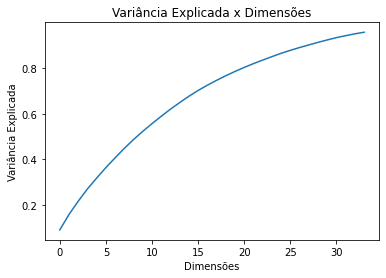

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,PC_30,PC_31,PC_32,PC_33
0,0.437384,0.610848,-0.928399,0.067422,-0.781877,-0.315036,-0.283928,-0.744882,-0.335167,-0.128893,-0.680501,0.423675,-0.605605,0.317296,-0.726211,0.597447,0.705736,-0.033399,-0.336829,-0.546119,-0.143657,0.578406,0.266777,0.469817,-0.345410,-0.301936,0.288700,-0.611307,-0.138903,-0.104078,-0.073193,0.245431,-0.081370,-0.415013
1,-0.820003,0.496801,0.250513,-0.769484,-0.777974,-0.150182,0.747129,-0.409078,0.291539,-0.995386,-0.330697,-0.459876,-0.607716,0.264172,-0.313466,-0.643996,-0.232379,0.456937,-0.100078,0.307565,0.050138,-0.320949,-0.194713,0.032938,-0.095590,-0.176171,-0.033575,-0.001839,-0.350067,0.167838,-0.080086,0.271164,-0.123376,0.007457
2,-0.644557,0.004811,-0.611295,-0.462880,0.102930,1.039909,-0.208754,-0.569245,0.223915,-0.915931,-0.712058,0.330954,-0.412271,0.318752,-0.150912,-0.217878,-0.310312,-0.067829,0.126350,-0.076875,-0.612877,-0.513818,0.087771,1.096752,0.044354,0.168116,-0.080076,-0.233475,0.241585,-0.283693,-0.083809,-0.051694,-0.071873,0.188728
3,1.043689,0.071746,-0.041711,0.534740,-0.556585,0.445612,-0.518722,0.277336,-0.790720,-0.067237,0.644629,-0.240477,-0.371589,-0.767101,-0.210659,-0.100829,-0.324646,-0.138394,0.681210,0.355298,-0.103521,-0.301980,-0.177010,-0.501512,0.511197,0.026867,0.749983,0.004002,0.237629,-0.097222,-0.058166,-0.101860,0.344149,-0.089492
4,0.019232,-0.828146,1.178606,-0.833041,-0.703091,0.120778,0.618521,-0.819292,0.053169,0.324489,-0.202521,-0.070184,-0.327314,-0.371043,0.286335,0.718395,0.362941,-0.346787,0.098380,0.155128,-0.342912,0.090940,-0.256486,-0.393852,0.269645,0.161048,-0.208816,0.280793,-0.212848,0.075280,-0.128092,0.000199,-0.005225,0.159028


In [7]:
taxa = 0.95
principal_components_2 = aplica_pca(taxa, dataset_features)
principal_components_2.add_prefix('PC_').head()

###  3 - Taxa de Variância Explicada: 90%

Taxa de Variância Explicada: 0.9
Número de Componentes Principais: 28


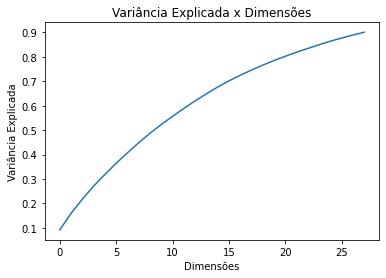

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27
0,0.437384,0.610848,-0.928399,0.067422,-0.781877,-0.315036,-0.283928,-0.744882,-0.335167,-0.128893,-0.680501,0.423675,-0.605605,0.317296,-0.726211,0.597447,0.705736,-0.033399,-0.336829,-0.546119,-0.143657,0.578406,0.266777,0.469817,-0.345410,-0.301936,0.288700,-0.611307
1,-0.820003,0.496801,0.250513,-0.769484,-0.777974,-0.150182,0.747129,-0.409078,0.291539,-0.995386,-0.330697,-0.459876,-0.607716,0.264172,-0.313466,-0.643996,-0.232379,0.456937,-0.100078,0.307565,0.050138,-0.320949,-0.194713,0.032938,-0.095590,-0.176171,-0.033575,-0.001839
2,-0.644557,0.004811,-0.611295,-0.462880,0.102930,1.039909,-0.208754,-0.569245,0.223915,-0.915931,-0.712058,0.330954,-0.412271,0.318752,-0.150912,-0.217878,-0.310312,-0.067829,0.126350,-0.076875,-0.612877,-0.513818,0.087771,1.096752,0.044354,0.168116,-0.080076,-0.233475
3,1.043689,0.071746,-0.041711,0.534740,-0.556585,0.445612,-0.518722,0.277336,-0.790720,-0.067237,0.644629,-0.240477,-0.371589,-0.767101,-0.210659,-0.100829,-0.324646,-0.138394,0.681210,0.355298,-0.103521,-0.301980,-0.177010,-0.501512,0.511197,0.026867,0.749983,0.004002
4,0.019232,-0.828146,1.178606,-0.833041,-0.703091,0.120778,0.618521,-0.819292,0.053169,0.324489,-0.202521,-0.070184,-0.327314,-0.371043,0.286335,0.718395,0.362941,-0.346787,0.098380,0.155128,-0.342912,0.090940,-0.256486,-0.393852,0.269645,0.161048,-0.208816,0.280793


In [8]:
taxa = 0.90
principal_components_3 = aplica_pca(taxa, dataset_features)
principal_components_3.add_prefix('PC_').head()

### 4 - Taxa de Variância Explicada: 85%

Taxa de Variância Explicada: 0.85
Número de Componentes Principais: 25


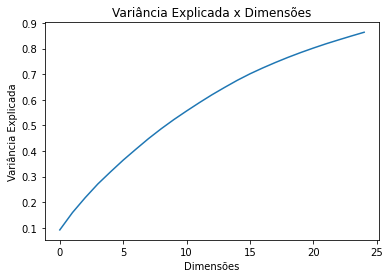

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24
0,0.437384,0.610848,-0.928399,0.067422,-0.781877,-0.315036,-0.283928,-0.744882,-0.335167,-0.128893,-0.680501,0.423675,-0.605605,0.317296,-0.726211,0.597447,0.705736,-0.033399,-0.336829,-0.546119,-0.143657,0.578406,0.266777,0.469817,-0.345410
1,-0.820003,0.496801,0.250513,-0.769484,-0.777974,-0.150182,0.747129,-0.409078,0.291539,-0.995386,-0.330697,-0.459876,-0.607716,0.264172,-0.313466,-0.643996,-0.232379,0.456937,-0.100078,0.307565,0.050138,-0.320949,-0.194713,0.032938,-0.095590
2,-0.644557,0.004811,-0.611295,-0.462880,0.102930,1.039909,-0.208754,-0.569245,0.223915,-0.915931,-0.712058,0.330954,-0.412271,0.318752,-0.150912,-0.217878,-0.310312,-0.067829,0.126350,-0.076875,-0.612877,-0.513818,0.087771,1.096752,0.044354
3,1.043689,0.071746,-0.041711,0.534740,-0.556585,0.445612,-0.518722,0.277336,-0.790720,-0.067237,0.644629,-0.240477,-0.371589,-0.767101,-0.210659,-0.100829,-0.324646,-0.138394,0.681210,0.355298,-0.103521,-0.301980,-0.177010,-0.501512,0.511197
4,0.019232,-0.828146,1.178606,-0.833041,-0.703091,0.120778,0.618521,-0.819292,0.053169,0.324489,-0.202521,-0.070184,-0.327314,-0.371043,0.286335,0.718395,0.362941,-0.346787,0.098380,0.155128,-0.342912,0.090940,-0.256486,-0.393852,0.269645


In [9]:
taxa = 0.85
principal_components_4 = aplica_pca(taxa, dataset_features)
principal_components_4.add_prefix('PC_').head()

### 5 - Taxa de Variância Explicada: 80%

Taxa de Variância Explicada: 0.8
Número de Componentes Principais: 21


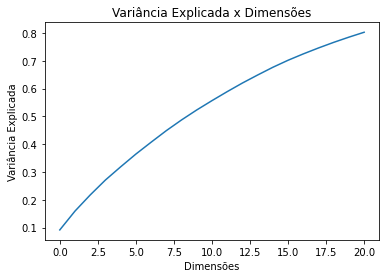

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20
0,0.437384,0.610848,-0.928399,0.067422,-0.781877,-0.315036,-0.283928,-0.744882,-0.335167,-0.128893,-0.680501,0.423675,-0.605605,0.317296,-0.726211,0.597447,0.705736,-0.033399,-0.336829,-0.546119,-0.143657
1,-0.820003,0.496801,0.250513,-0.769484,-0.777974,-0.150182,0.747129,-0.409078,0.291539,-0.995386,-0.330697,-0.459876,-0.607716,0.264172,-0.313466,-0.643996,-0.232379,0.456937,-0.100078,0.307565,0.050138
2,-0.644557,0.004811,-0.611295,-0.462880,0.102930,1.039909,-0.208754,-0.569245,0.223915,-0.915931,-0.712058,0.330954,-0.412271,0.318752,-0.150912,-0.217878,-0.310312,-0.067829,0.126350,-0.076875,-0.612877
3,1.043689,0.071746,-0.041711,0.534740,-0.556585,0.445612,-0.518722,0.277336,-0.790720,-0.067237,0.644629,-0.240477,-0.371589,-0.767101,-0.210659,-0.100829,-0.324646,-0.138394,0.681210,0.355298,-0.103521
4,0.019232,-0.828146,1.178606,-0.833041,-0.703091,0.120778,0.618521,-0.819292,0.053169,0.324489,-0.202521,-0.070184,-0.327314,-0.371043,0.286335,0.718395,0.362941,-0.346787,0.098380,0.155128,-0.342912


In [10]:
taxa = 0.80
principal_components_5 = aplica_pca(taxa, dataset_features)
principal_components_5.add_prefix('PC_').head()

### 6 - Taxa de Variância Explicada: 75%

Taxa de Variância Explicada: 0.75
Número de Componentes Principais: 19


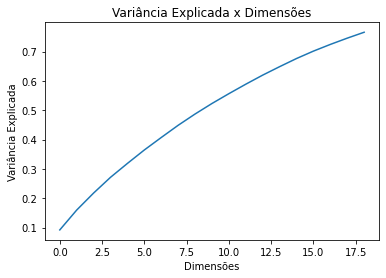

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18
0,0.437384,0.610848,-0.928399,0.067422,-0.781877,-0.315036,-0.283928,-0.744882,-0.335167,-0.128893,-0.680501,0.423675,-0.605605,0.317296,-0.726211,0.597447,0.705736,-0.033399,-0.336829
1,-0.820003,0.496801,0.250513,-0.769484,-0.777974,-0.150182,0.747129,-0.409078,0.291539,-0.995386,-0.330697,-0.459876,-0.607716,0.264172,-0.313466,-0.643996,-0.232379,0.456937,-0.100078
2,-0.644557,0.004811,-0.611295,-0.462880,0.102930,1.039909,-0.208754,-0.569245,0.223915,-0.915931,-0.712058,0.330954,-0.412271,0.318752,-0.150912,-0.217878,-0.310312,-0.067829,0.126350
3,1.043689,0.071746,-0.041711,0.534740,-0.556585,0.445612,-0.518722,0.277336,-0.790720,-0.067237,0.644629,-0.240477,-0.371589,-0.767101,-0.210659,-0.100829,-0.324646,-0.138394,0.681210
4,0.019232,-0.828146,1.178606,-0.833041,-0.703091,0.120778,0.618521,-0.819292,0.053169,0.324489,-0.202521,-0.070184,-0.327314,-0.371043,0.286335,0.718395,0.362941,-0.346787,0.098380


In [11]:
taxa = 0.75
principal_components_6 = aplica_pca(taxa, dataset_features)
principal_components_6.add_prefix('PC_').head()

### 7 - Taxa de Variância Explicada: 70%

Taxa de Variância Explicada: 0.7
Número de Componentes Principais: 16


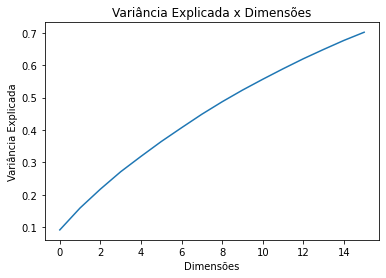

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15
0,0.437384,0.610848,-0.928399,0.067422,-0.781877,-0.315036,-0.283928,-0.744882,-0.335167,-0.128893,-0.680501,0.423675,-0.605605,0.317296,-0.726211,0.597447
1,-0.820003,0.496801,0.250513,-0.769484,-0.777974,-0.150182,0.747129,-0.409078,0.291539,-0.995386,-0.330697,-0.459876,-0.607716,0.264172,-0.313466,-0.643996
2,-0.644557,0.004811,-0.611295,-0.462880,0.102930,1.039909,-0.208754,-0.569245,0.223915,-0.915931,-0.712058,0.330954,-0.412271,0.318752,-0.150912,-0.217878
3,1.043689,0.071746,-0.041711,0.534740,-0.556585,0.445612,-0.518722,0.277336,-0.790720,-0.067237,0.644629,-0.240477,-0.371589,-0.767101,-0.210659,-0.100829
4,0.019232,-0.828146,1.178606,-0.833041,-0.703091,0.120778,0.618521,-0.819292,0.053169,0.324489,-0.202521,-0.070184,-0.327314,-0.371043,0.286335,0.718395


In [12]:
taxa = 0.70
principal_components_6 = aplica_pca(taxa, dataset_features)
principal_components_6.add_prefix('PC_').head()

# Exporta o dataset com os componentes principais selecionados

In [13]:
# Indicar o resultado que queremos exportar
dataset_pca = principal_components_6

# Adiciona o Prefixo no nome da coluna
dataset_pca = dataset_pca.add_prefix('PC_')

# Adiciona a coluna Target
dataset_pca['is_approved'] = dataset_target

dataset_pca.to_csv("dataset/dataset-pca.csv", index=False)
print("Rows: {}".format(len(dataset_pca)))
print("Columns: {}" .format(len(dataset_pca.columns)))
dataset_pca.head()

Rows: 649
Columns: 17


,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,is_approved
0,0.437384,0.610848,-0.928399,0.067422,-0.781877,-0.315036,-0.283928,-0.744882,-0.335167,-0.128893,-0.680501,0.423675,-0.605605,0.317296,-0.726211,0.597447,0.0
1,-0.820003,0.496801,0.250513,-0.769484,-0.777974,-0.150182,0.747129,-0.409078,0.291539,-0.995386,-0.330697,-0.459876,-0.607716,0.264172,-0.313466,-0.643996,0.0
2,-0.644557,0.004811,-0.611295,-0.462880,0.102930,1.039909,-0.208754,-0.569245,0.223915,-0.915931,-0.712058,0.330954,-0.412271,0.318752,-0.150912,-0.217878,1.0
3,1.043689,0.071746,-0.041711,0.534740,-0.556585,0.445612,-0.518722,0.277336,-0.790720,-0.067237,0.644629,-0.240477,-0.371589,-0.767101,-0.210659,-0.100829,1.0
4,0.019232,-0.828146,1.178606,-0.833041,-0.703091,0.120778,0.618521,-0.819292,0.053169,0.324489,-0.202521,-0.070184,-0.327314,-0.371043,0.286335,0.718395,1.0
